In [59]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.cross_validation import train_test_split
from sklearn.metrics import log_loss
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier

In [5]:
%matplotlib inline

In [2]:
data = pd.read_csv('gbm-data.csv')

In [3]:
data.head()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0


In [14]:
x = data.values[:, 1:1778]
y = data.values[:, 0]

In [16]:
train_x, test_x, train_y, test_y = train_test_split(x, y,  test_size = 0.8, random_state = 241)

In [22]:
lrs = [1, 0.5, 0.3, 0.2, 0.1]

In [20]:
for lr in lrs:
    clf = GradientBoostingClassifier(n_estimators=250, verbose=True, random_state=241,learning_rate=lr)
    clf.fit(train_x, train_y)
    clf.staged_decision_function()

In [50]:
clf = GradientBoostingClassifier(n_estimators=250, verbose=True, random_state=241,learning_rate=0.2)
clf.fit(train_x, train_y)

ll_test = []
ll_train = []

for i, y_pred in enumerate(clf.staged_decision_function(test_x)):
    y_pred_sigma = 1 / (1 + np.exp(-y_pred))
    ll_test.append(log_loss(test_y, y_pred_sigma))

for i, y_pred in enumerate(clf.staged_decision_function(train_x)):
    y_pred_sigma = 1 / (1 + np.exp(-y_pred))
    ll_train.append(log_loss(train_y, y_pred_sigma))

      Iter       Train Loss   Remaining Time 
         1           1.2613           40.34s
         2           1.1715           38.69s
         3           1.1009           36.39s
         4           1.0529           36.47s
         5           1.0130           36.36s
         6           0.9740           36.19s
         7           0.9475           35.06s
         8           0.9197           35.03s
         9           0.8979           34.54s
        10           0.8730           34.44s
        20           0.7207           28.69s
        30           0.6055           26.35s
        40           0.5244           24.82s
        50           0.4501           23.31s
        60           0.3908           21.73s
        70           0.3372           20.39s
        80           0.3009           19.19s
        90           0.2603           18.10s
       100           0.2327           16.90s
       200           0.0835            5.54s


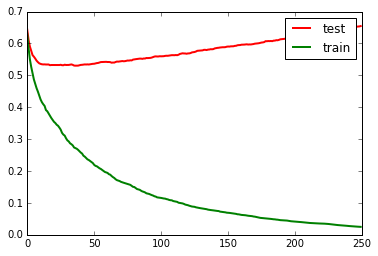

In [51]:
plt.figure()
plt.plot(ll_test, 'r', linewidth=2)
plt.plot(ll_train, 'g', linewidth=2)
plt.legend(['test', 'train'])

In [47]:
with open('ans5.2', 'w') as f:
    f.write('overfitting')

In [48]:
!less ans5.2

overfitting


In [57]:
ans3 = str(round(np.min(ll_test), 2)) + ' ' + str(np.argmin(ll_test))
with open('ans5.3', 'w') as f:
    f.write(ans3)

In [58]:
!less ans5.3

0.53 36


In [60]:
clf2 = RandomForestClassifier(random_state=241, n_estimators=36)

In [61]:
clf2.fit(train_x, train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=36, n_jobs=1,
            oob_score=False, random_state=241, verbose=0, warm_start=False)

In [63]:
y_pred2 = clf2.predict_proba(test_x)

In [66]:
y_pred2.shape

(3001L, 2L)

In [68]:
test_y.shape

(3001L,)

In [71]:
ans4 = log_loss(test_y, y_pred2)
with open('ans5.4', 'w') as f:
    f.write(str(round(ans4, 2)))

In [72]:
!less ans5.4

0.54
